In [1]:
import numpy as np 
gate = np.load('gate_weights.npy')
corr = np.load('corr_features.npy')

In [2]:
np.mean(gate, axis=0).mean(0).mean(0)

array([0.388115  , 0.2730425 , 0.33884257], dtype=float32)

In [3]:

print(f"{gate[..., 0].mean()}, {gate[..., 0].std()}, {gate[..., 0].min()}, {gate[..., 0].max()}")
print(f"{gate[..., 1].mean()}, {gate[..., 1].std()}, {gate[..., 1].min()}, {gate[..., 1].max()}")
print(f"{gate[..., 2].mean()}, {gate[..., 2].std()}, {gate[..., 2].min()}, {gate[..., 2].max()}")

0.02581436187028885, 0.018951134756207466, 0.010461383499205112, 0.5627473592758179
0.5623912811279297, 0.03521076217293739, 0.08949103206396103, 0.8515198230743408
0.41179436445236206, 0.030514759942889214, 0.07053770869970322, 0.5436270236968994


In [2]:
# softmax on corr
corr = np.exp(corr) / np.exp(corr).sum(-1, keepdims=True)
print(f"{gate[..., 0].mean()}, {gate[..., 0].std()}, {gate[..., 0].min()}, {gate[..., 0].max()},\
{gate[..., 1].mean()}, {gate[..., 1].std()}, {gate[..., 1].min()}, {gate[..., 1].max()}, \
{gate[..., 2].mean()}, {gate[..., 2].std()}, {gate[..., 2].min()}, {gate[..., 2].max()}, \
{corr[..., 0].mean()}, {corr[..., 0].std()}, {corr[..., 0].min()}, {corr[..., 0].max()}, \
{corr[..., 1].mean()}, {corr[..., 1].std()}, {corr[..., 1].min()}, {corr[..., 1].max()}, \
{corr[..., 2].mean()}, {corr[..., 2].std()}, {corr[..., 2].min()}, {corr[..., 2].max()}")

0.3775287866592407, 0.0014813760062679648, 0.22243745625019073, 0.5233768224716187,0.23032018542289734, 0.0012620756169781089, 0.21058909595012665, 0.6957102417945862, 0.392153799533844, 0.002071502385661006, 0.06704714894294739, 0.3969653844833374, 0.3321245312690735, 0.0027175163850188255, 0.32500597834587097, 0.33604371547698975, 0.33197298645973206, 0.0013944298261776567, 0.32862916588783264, 0.33508867025375366, 0.33590248227119446, 0.0019842267502099276, 0.33193129301071167, 0.3402872383594513


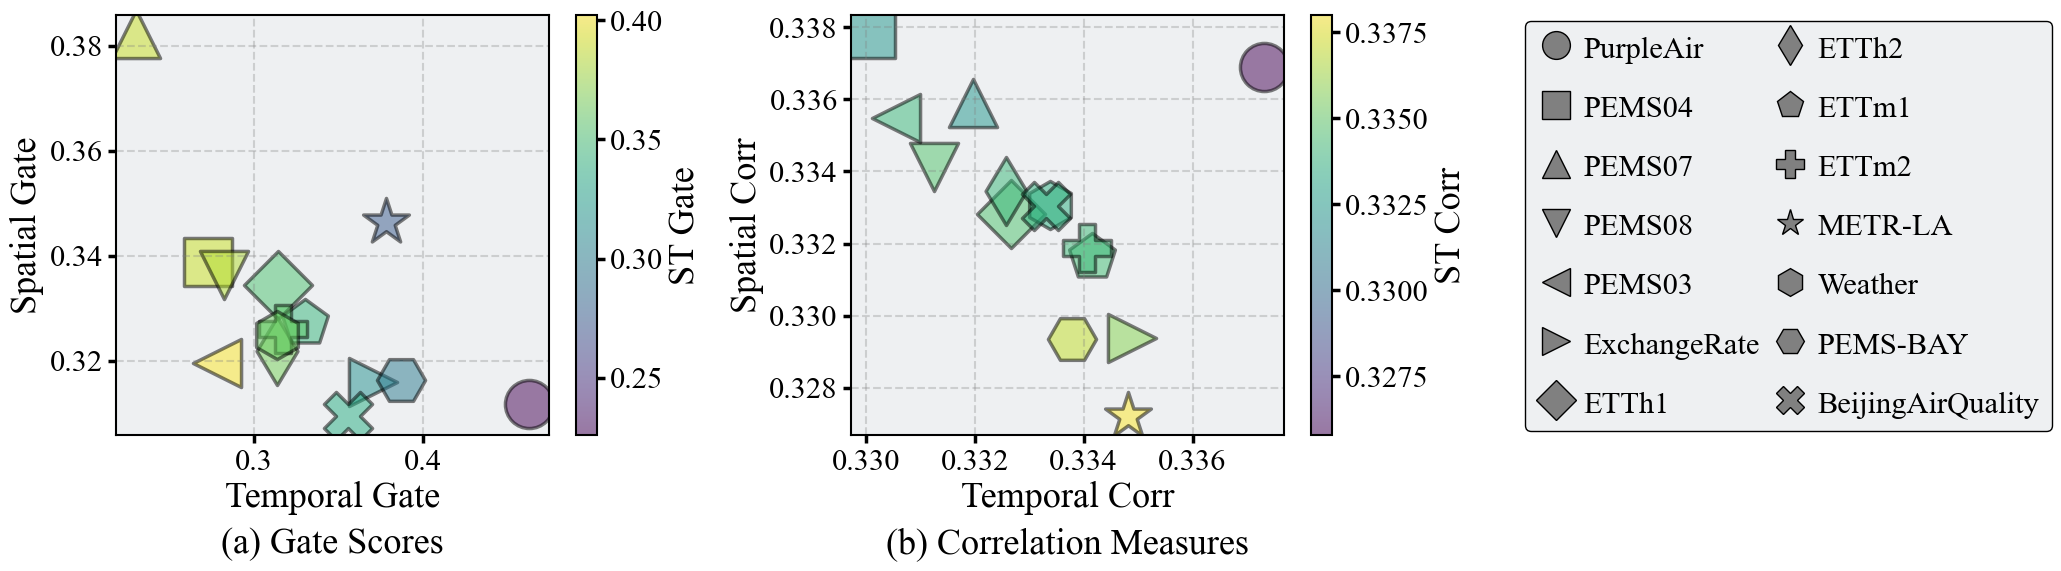

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========= 1) 读 CSV（两行表头），第一列为数据集名称 =========
csv_path = "log.csv"  # ←← 改成你的 CSV 路径
df = pd.read_csv(csv_path, header=[0, 1], index_col=0)

# 清洗/修复多级表头：把第一层为空的地方向前填充为 'gate' 或 'corr'
lvl0 = df.columns.get_level_values(0).to_series()
lvl1 = df.columns.get_level_values(1).to_series()

# 前向填充空白组名（'' 或 NaN）
lvl0 = lvl0.replace({np.nan: None, "": None}).ffill()
# 去除第二层字段名的首尾空格
lvl1 = lvl1.astype(str).str.strip()

df.columns = pd.MultiIndex.from_arrays([lvl0.values, lvl1.values])

# ========= 2) 校验列是否齐全（可选，但有助于及早发现格式问题） =========
expected_cols = ['st mean','st std','st min','st max',
                 't mean','t std','t min','t max',
                 's mean','s std','s min','s max']
for grp in ['gate', 'corr']:
    missing = [c for c in expected_cols if c not in df[grp].columns]
    if missing:
        raise ValueError(f"{grp} 缺少字段: {missing}. 请检查 CSV 表头是否与示例一致。")

# ========= 3) 画图 =========
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.0,
    "font.size": 20,
    "axes.linewidth": 1.5,
})



markers = [
    "o", "s", "^", "v", "<", ">", "D", "d", "p", "P",
    "*", "h", "H", "X", "+"
]

# 👇 调整子图之间的距离 —— 关键修改
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6.3))
plt.subplots_adjust(wspace=0)  # ←← 减小左右间距（默认 0.2~0.3）

# ---------- gate ----------
legend_handles = []
vmin_gate = df['gate']['st mean'].min()
vmax_gate = df['gate']['st mean'].max()

for idx, (name, row) in enumerate(df.iterrows()):
    x = row[('gate', 't mean')]
    y = row[('gate', 's mean')]
    color_depth = row[('gate', 'st mean')]
    # size = (np.sqrt(np.sqrt(row[('gate', 'st std')])) +
    #         np.sqrt(np.sqrt(row[('gate', 's std')])) +
    #         np.sqrt(np.sqrt(row[('gate', 't std')]))) * 4000
    size = 1200

    sc = ax1.scatter(x, y, c=[color_depth], cmap='viridis',
                     s=size, alpha=0.5, edgecolors='black', linewidth=2.5,
                     marker=markers[idx % len(markers)],
                     vmin=vmin_gate, vmax=vmax_gate)

    legend_handles.append(plt.Line2D(
        [0], [0],
        marker=markers[idx % len(markers)],
        color='black',
        markerfacecolor='gray',
        markeredgecolor='black',
        markersize=20,
        linewidth=0,
        label=name
    ))

ax1.set_xlabel('Temporal Gate', fontsize=26)
ax1.set_ylabel('Spatial Gate', fontsize=26)
ax1.set_title('(a) Gate Scores', fontsize=26, y=-0.3)
ax1.grid(True, alpha=0.3)
ax1.tick_params(labelsize=22, width=2.5, length=6)
cbar1 = plt.colorbar(sc, ax=ax1)
cbar1.set_label('ST Gate', fontsize=26)
cbar1.ax.tick_params(labelsize=22, width=2.5, length=6)
cbar1.outline.set_linewidth(1.5)

# 👇 添加 x=y 的虚线
# xy_min = min(ax1.get_xlim()[0], ax1.get_ylim()[0])
# xy_max = max(ax1.get_xlim()[1], ax1.get_ylim()[1])
# ax1.plot([xy_min, xy_max], [xy_min, xy_max], 'k--', lw=2, alpha=0.6, zorder=0)


# ---------- corr ----------
vmin_corr = df['corr']['st mean'].min()
vmax_corr = df['corr']['st mean'].max()

for idx, (name, row) in enumerate(df.iterrows()):
    x = row[('corr', 't mean')]
    y = row[('corr', 's mean')]
    color_depth = row[('corr', 'st mean')]
    # size = (np.sqrt(np.sqrt(row[('corr', 'st std')])) +
    #         np.sqrt(np.sqrt(row[('corr', 's std')])) +
    #         np.sqrt(np.sqrt(row[('corr', 't std')]))) * 4000
    size = 1200

    sc2 = ax2.scatter(x, y, c=[color_depth], cmap='viridis',
                      s=size, alpha=0.5, edgecolors='black', linewidth=2.5,
                      marker=markers[idx % len(markers)],
                      vmin=vmin_corr, vmax=vmax_corr)

ax2.set_xlabel('Temporal Corr', fontsize=26)
ax2.set_ylabel('Spatial Corr', fontsize=26)
ax2.set_title('(b) Correlation Measures', fontsize=26, y=-0.3)
ax2.grid(True, alpha=0.3)
ax2.tick_params(labelsize=22, width=2.5, length=6)
cbar2 = plt.colorbar(sc2, ax=ax2)
cbar2.set_label('ST Corr', fontsize=26)
cbar2.ax.tick_params(labelsize=22, width=2.5, length=6)
cbar2.outline.set_linewidth(1.5)

# 👇 添加第二个图的 x=y 虚线
# xy_min2 = min(ax2.get_xlim()[0], ax2.get_ylim()[0])
# xy_max2 = max(ax2.get_xlim()[1], ax2.get_ylim()[1])
# ax2.plot([xy_min2, xy_max2], [xy_min2, xy_max2], 'k--', lw=2, alpha=0.6, zorder=0)


# ---------- 紧凑型 legend ----------
fig.legend(
    handles=legend_handles,
    loc='center left',
    bbox_to_anchor=(1.02, 0.61),
    ncol=2,
    fontsize=22,
    frameon=True,              # ← 打开边框
    framealpha=1.0,            # ← 不透明度
    edgecolor='black',         # ← 边框颜色
    # linewidth=1.5,             # ← 边框线宽
    handletextpad=0.3,
    columnspacing=0.4,
    handlelength=1.2,
    handleheight=1.0,
    labelspacing=0.95           # ← 调整上下间距
)

plt.tight_layout()
plt.savefig('gate_corr_scatter.pdf', dpi=300, bbox_inches='tight')
plt.show()

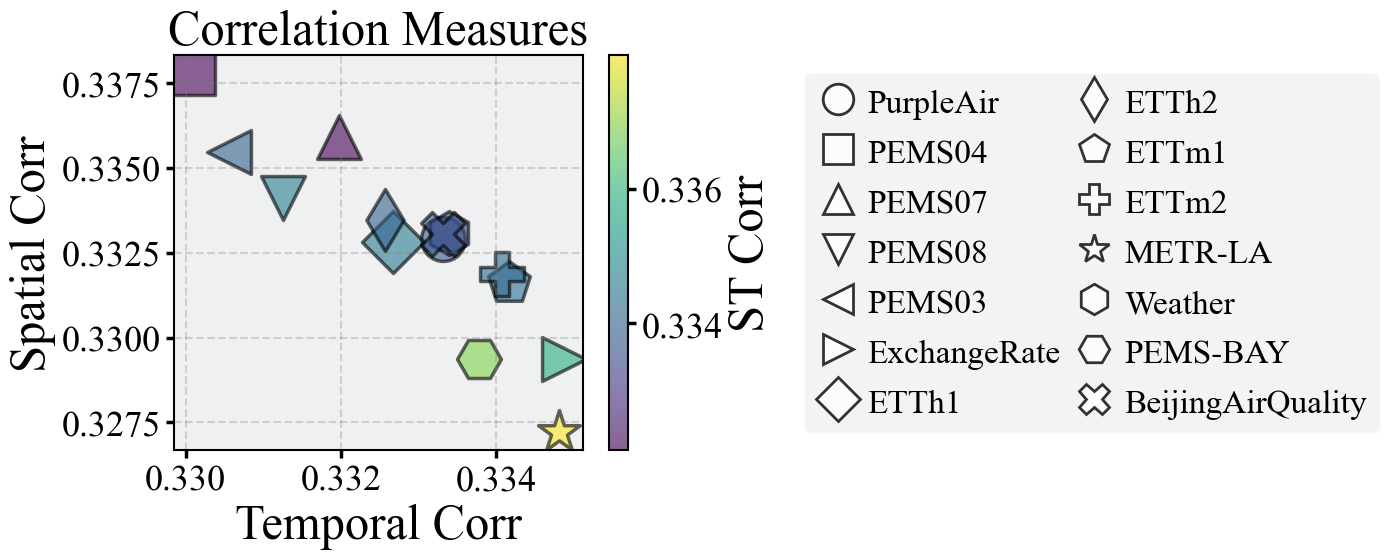

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========= 1) 读 CSV（两行表头），第一列为数据集名称 =========
csv_path = "log.csv"  # ←← 改成你的 CSV 路径
df = pd.read_csv(csv_path, header=[0, 1], index_col=0)

# 清洗/修复多级表头：把第一层为空的地方向前填充为 'gate' 或 'corr'
lvl0 = df.columns.get_level_values(0).to_series()
lvl1 = df.columns.get_level_values(1).to_series()

# 前向填充空白组名（'' 或 NaN）
lvl0 = lvl0.replace({np.nan: None, "": None}).ffill()
# 去除第二层字段名的首尾空格
lvl1 = lvl1.astype(str).str.strip()

df.columns = pd.MultiIndex.from_arrays([lvl0.values, lvl1.values])

# ========= 2) 校验列是否齐全（可选，但有助于及早发现格式问题） =========
expected_cols = ['st mean','st std','st min','st max',
                 't mean','t std','t min','t max',
                 's mean','s std','s min','s max']
for grp in ['gate', 'corr']:
    missing = [c for c in expected_cols if c not in df[grp].columns]
    if missing:
        raise ValueError(f"{grp} 缺少字段: {missing}. 请检查 CSV 表头是否与示例一致。")

# ========= 3) 画图设置（与 Gate 图保持一致） =========
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.0,
    "font.size": 20,
    "axes.linewidth": 1.5,
})

PALETTE = [
    (123/255.0, 141/255.0, 191/255.0),
    (250/255.0, 127/255.0, 111/255.0),
    (130/255.0, 176/255.0, 210/255.0),
    (255/255.0, 190/255.0, 122/255.0),
    (87/255.0, 184/255.0, 147/255.0),
    "#C76DA2",
]

markers = [
    "o", "s", "^", "v", "<", ">", "D", "d", "p", "P",
    "*", "h", "H", "X", "+"
]

# ========= 4) Correlation Measures 图（样式对齐 Gate 图） =========
fig, ax = plt.subplots(1, 1, figsize=(15.5, 6))

legend_handles = []
vmin_corr = df['corr']['st mean'].min()
vmax_corr = df['corr']['st mean'].max()

for idx, (name, row) in enumerate(df.iterrows()):
    x = row[('corr', 't mean')]
    y = row[('corr', 's mean')]
    color_depth = row[('corr', 'st mean')]
    size = 1000  # 与 Gate 图一致

    sc = ax.scatter(
        x, y,
        c=[color_depth], cmap='viridis',
        s=size, alpha=0.6,                 # 与 Gate 图一致
        edgecolors='black', linewidth=2.5, # 与 Gate 图一致
        marker=markers[idx % len(markers)],
        vmin=vmin_corr, vmax=vmax_corr
    )

    # 图例句柄：与 Gate 图一致（白色实心、黑色描边、较大尺寸）
    legend_handles.append(plt.Line2D(
        [0], [0],
        marker=markers[idx % len(markers)],
        markerfacecolor='white',
        alpha=0.8,
        markeredgecolor='black',
        markeredgewidth=2,
        markersize=22,
        linewidth=0,
        label=name
    ))

ax.set_xlabel('Temporal Corr', fontsize=35)
ax.set_ylabel('Spatial Corr', fontsize=35)
ax.set_title('Correlation Measures', fontsize=35)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=26, width=2.5, length=6)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('ST Corr', fontsize=35)
cbar.ax.tick_params(labelsize=26, width=2.5, length=6)
cbar.outline.set_linewidth(1.5)

# 图例样式：与 Gate 图一致的位置/外观
ax.legend(
    handles=legend_handles,
    loc='center left',
    bbox_to_anchor=(1.5, 0.5),
    ncol=2,
    fontsize=24,
    frameon=True,
    framealpha=0.8,
    edgecolor='white',
    facecolor='#EEF0F2',
    handletextpad=0.3,
    columnspacing=0.4,
    handlelength=1.2,
    handleheight=1.0,
    labelspacing=0.5,
)

plt.tight_layout()
plt.savefig('corr_scatter.pdf', dpi=300, bbox_inches='tight')
plt.show()

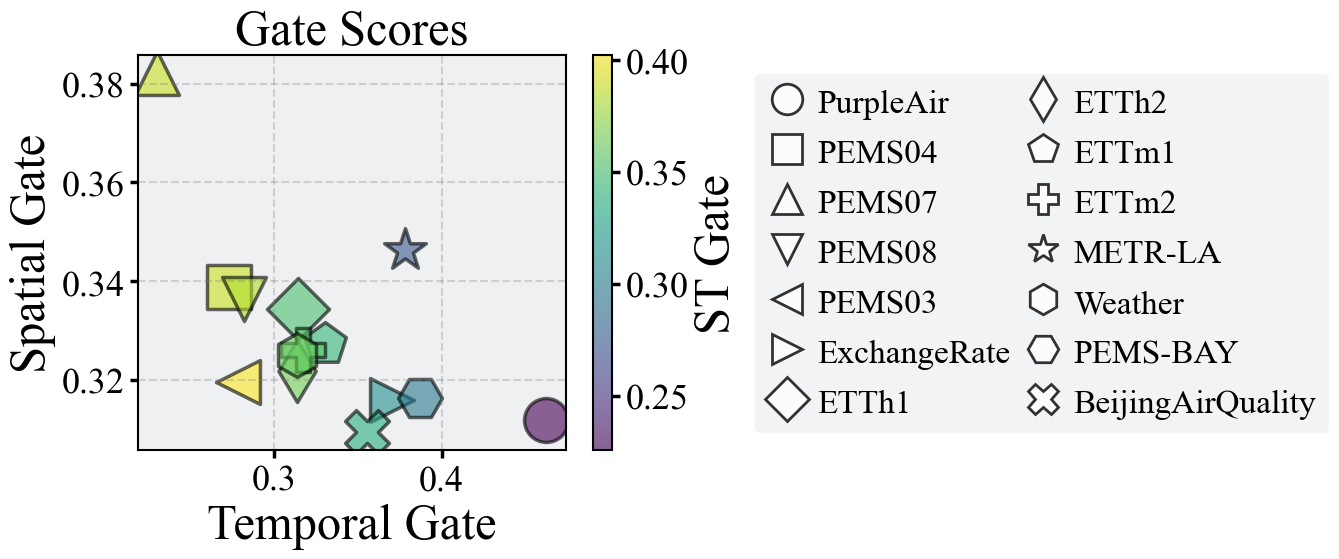

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ========= 1) 读 CSV（两行表头），第一列为数据集名称 =========
csv_path = "log.csv"  # ←← 改成你的 CSV 路径
df = pd.read_csv(csv_path, header=[0, 1], index_col=0)

# 清洗/修复多级表头：把第一层为空的地方向前填充为 'gate' 或 'corr'
lvl0 = df.columns.get_level_values(0).to_series()
lvl1 = df.columns.get_level_values(1).to_series()

# 前向填充空白组名（'' 或 NaN）
lvl0 = lvl0.replace({np.nan: None, "": None}).ffill()
# 去除第二层字段名的首尾空格
lvl1 = lvl1.astype(str).str.strip()

df.columns = pd.MultiIndex.from_arrays([lvl0.values, lvl1.values])

# ========= 2) 校验列是否齐全（可选，但有助于及早发现格式问题） =========
expected_cols = ['st mean','st std','st min','st max',
                 't mean','t std','t min','t max',
                 's mean','s std','s min','s max']
for grp in ['gate', 'corr']:
    missing = [c for c in expected_cols if c not in df[grp].columns]
    if missing:
        raise ValueError(f"{grp} 缺少字段: {missing}. 请检查 CSV 表头是否与示例一致。")

# ========= 3) 画图设置 =========
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.0,
    "font.size": 20,
    "axes.linewidth": 1.5,
})

PALETTE = [
    (123/255.0, 141/255.0, 191/255.0),  # warm coral
    (250/255.0, 127/255.0, 111/255.0),  # mustard/golden
    (130/255.0, 176/255.0, 210/255.0),  # green
    (255/255.0, 190/255.0, 122/255.0),  # teal green
    (87/255.0, 184/255.0, 147/255.0),  # bright blue
    "#C76DA2",  # pink/magenta
]

markers = [
    "o", "s", "^", "v", "<", ">", "D", "d", "p", "P",
    "*", "h", "H", "X", "+"
]

# ========= 4) Gate Scores 图 =========
fig, ax = plt.subplots(1, 1, figsize=(14.5, 6))

legend_handles = []
vmin_gate = df['gate']['st mean'].min()
vmax_gate = df['gate']['st mean'].max()

for idx, (name, row) in enumerate(df.iterrows()):
    x = row[('gate', 't mean')]
    y = row[('gate', 's mean')]
    color_depth = row[('gate', 'st mean')]
    size = 1000

    sc = ax.scatter(x, y, c=[color_depth], cmap='viridis',
                    s=size, alpha=0.6, edgecolors='black', linewidth=2.5,
                    marker=markers[idx % len(markers)],
                    vmin=vmin_gate, vmax=vmax_gate)

    legend_handles.append(plt.Line2D(
        [0], [0],
        marker=markers[idx % len(markers)],
        # color=PALETTE[0],
        markerfacecolor='white',
        alpha=0.8,
        markeredgecolor='black',
        # marker edge width
        markeredgewidth=2,
        markersize=22,
        linewidth=0,
        label=name
    ))

ax.set_xlabel('Temporal Gate', fontsize=35)
ax.set_ylabel('Spatial Gate', fontsize=35)
ax.set_title('Gate Scores', fontsize=35)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=26, width=2.5, length=6)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('ST Gate', fontsize=35)
cbar.ax.tick_params(labelsize=26, width=2.5, length=6)
cbar.outline.set_linewidth(1.5)

# 添加图例
ax.legend(
    handles=legend_handles,
    loc='center left',
    bbox_to_anchor=(1.4, 0.5),
    ncol=2,
    fontsize=24,
    frameon=True,
    framealpha=0.8,
    edgecolor='white',
    facecolor='#EEF0F2',
    handletextpad=0.3,
    columnspacing=0.4,
    handlelength=1.2,
    handleheight=1.0,
    labelspacing=0.5,
    # title='Datasets',
    # title_fontsize=30
)

plt.tight_layout()
plt.savefig('gate_scatter.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# test results
import numpy as np

input_path = '../test_results/inputs.npy'
prediction_path = '../test_results/predictions.npy'
target_path = '../test_results/targets.npy'


# 假设你知道数据的形状和数据类型
# 需要知道：total_samples, feature_shape, dtype
total_samples = 2000  # 示例值，根据实际情况修改
input_shape = (gate.shape[-3], gate.shape[-2])  # 示例值，根据实际情况修改
pred_shape = target_shape = input_shape

# 加载 inputs
inputs = np.memmap(input_path, 
                   dtype='float32',  # 根据实际数据类型
                   mode='r',  # 只读模式
                   shape=(total_samples, *input_shape))

# 加载 predictions
predictions = np.memmap(prediction_path,
                       dtype='float32',
                       mode='r',
                       shape=(total_samples, *pred_shape))

# 加载 targets
targets = np.memmap(target_path,
                   dtype='float32',
                   mode='r',
                   shape=(total_samples, *target_shape))

# 使用数据
# 可以像普通 numpy 数组一样索引
batch = inputs[0:32]  # 获取前 32 个样本

# 如果需要加载全部到内存
inputs_array = np.array(inputs)

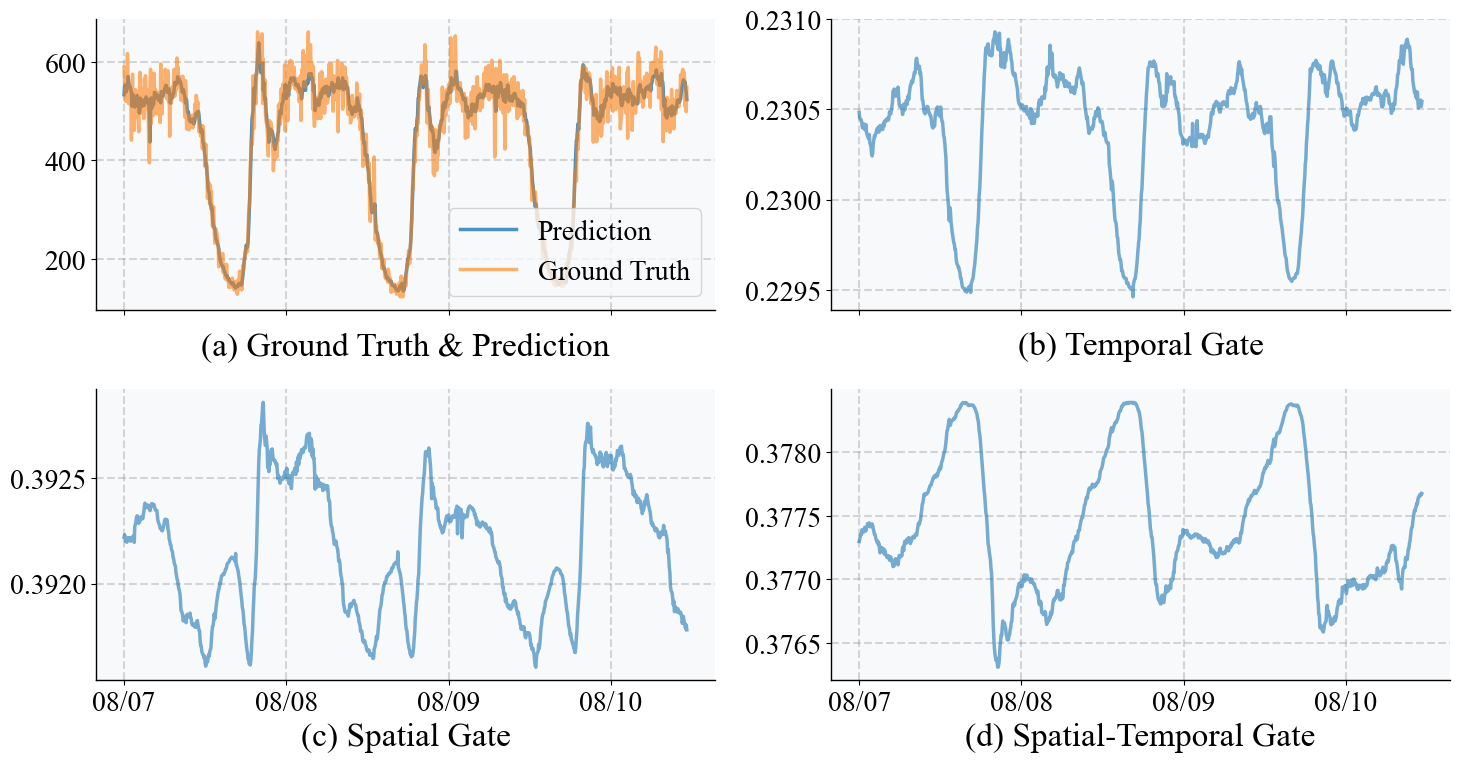

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# ──────────────────── GLOBAL STYLE ────────────────────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#F7F9FA",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.3,
    "font.size": 20,
    "axes.linewidth": 1,
})

# ──────────────────── 时间序列构造 ────────────────────
n_points = 1000
start_time = pd.Timestamp("2017-08-07 00:00")
time_index = pd.date_range(start=start_time, periods=n_points, freq="5min")

# ──────────────────── 绘图 ────────────────────
sample_idx = 0
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.flatten()

# 子图1：输入和目标
axs[0].plot(time_index, predictions[:1000, 0, 0], label='Prediction', alpha=0.8, linewidth=2.5)
axs[0].plot(time_index, targets[:1000, 0, 0], label='Ground Truth', alpha=0.6, linewidth=2.5)
axs[0].set_title('(a) Ground Truth & Prediction', y=-0.18)
axs[0].legend(loc='lower right')

# 子图2：门控 T
axs[1].plot(time_index, gate[:1000, 0, 0, 1], label='T', alpha=0.6, linewidth=2.5)
axs[1].set_title('(b) Temporal Gate', y=-0.18)
# axs[1].legend()

# 子图3：门控 S
axs[2].plot(time_index, gate[:1000, 0, 0, 2], label='S', alpha=0.6, linewidth=2.5)
axs[2].set_title('(c) Spatial Gate', y=-0.25)
# axs[2].legend()

# 子图4：门控 ST
axs[3].plot(time_index, gate[:1000, 0, 0, 0], label='ST', alpha=0.6, linewidth=2.5)
axs[3].set_title('(d) Spatial-Temporal Gate', y=-0.25)
# axs[3].legend()

# ──────────────────── 美化日期和Y轴格式 ────────────────────
for i, ax in enumerate(axs):
    # 横轴时间格式
    # ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d\n%H:%M"))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=24))  # 每4小时一个主刻度
    ax.tick_params(axis='x', rotation=0)
    if i < 2:
        ax.set_xticklabels([])  # 隐藏上排子图的X轴标签

    # Y轴保留两位小数
    if i != 0:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))

    # 边框取消
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# 自动调整布局
plt.tight_layout()
plt.show()

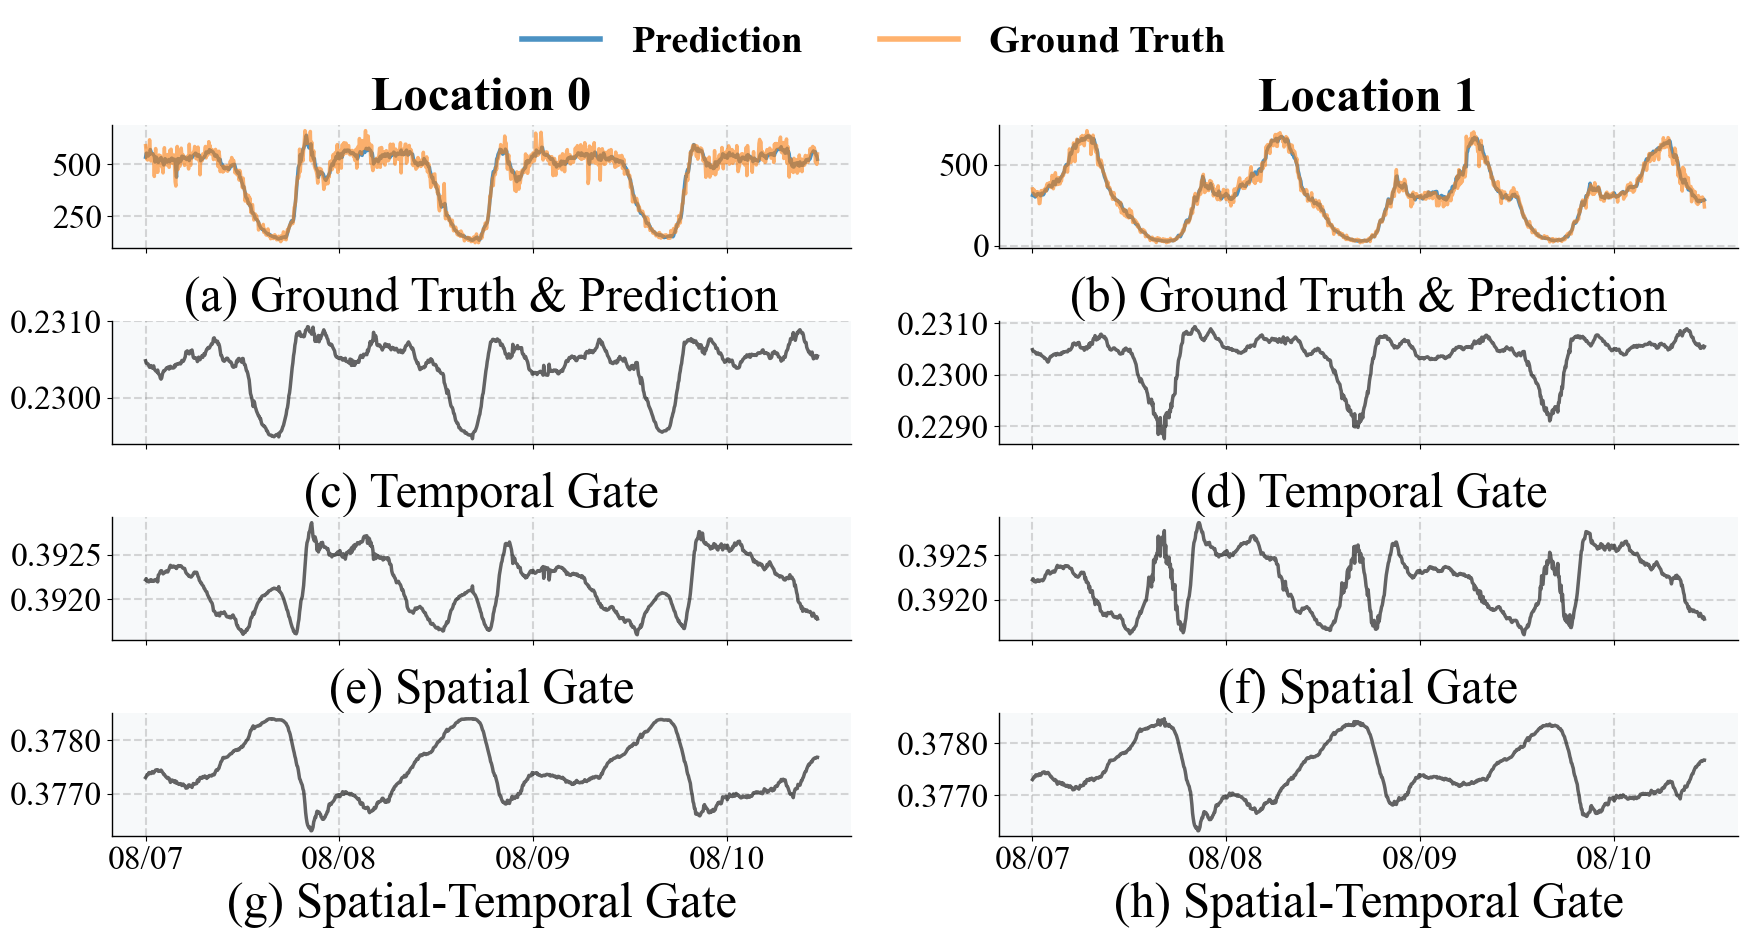

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

# ──────────────────── GLOBAL STYLE ────────────────────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#F7F9FA",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.3,
    "font.size": 24,           # ↑ 增大基础字号
    "axes.linewidth": 1,
})

# ──────────────────── 时间序列构造 ────────────────────
n_points = 1000
start_time = pd.Timestamp("2017-08-07 00:00")
time_index = pd.date_range(start=start_time, periods=n_points, freq="5min")

# ──────────────────── 选择两个 location（数据第二个 index） ────────────────────
loc_indices = [0, 700]         # 实际索引
display_ids = [0, 1]           # 图上显示为 Location 0, Location 1（固定）

# ──────────────────── 绘图：4行×2列（每列一个 location） ────────────────────
fig, axs = plt.subplots(4, 2, figsize=(18, 10), sharex='col')  # 同列共享X轴
axs = np.asarray(axs)
# plt.subplots_adjust(wspace=-)

row_titles = ['Ground Truth & Prediction', 'Temporal Gate', 'Spatial Gate', 'Spatial-Temporal Gate']
letters = list("abcdefgh")  # (a)~(h)

# 用于全局图例的句柄收集（去重）
legend_handles = {}
def collect_handles(ax):
    for h, lbl in zip(*ax.get_legend_handles_labels()):
        if lbl and lbl not in legend_handles:
            legend_handles[lbl] = h

for col, (loc_idx, disp_id) in enumerate(zip(loc_indices, display_ids)):
    # 第1行：GT vs Prediction
    ax = axs[0, col]
    l1, = ax.plot(time_index, predictions[:n_points, 0, loc_idx], label='Prediction', alpha=0.8, linewidth=2.5)
    l2, = ax.plot(time_index, targets[:n_points,    0, loc_idx], label='Ground Truth', alpha=0.6, linewidth=2.5)
    collect_handles(ax)

    # 第2行：Gate T
    ax = axs[1, col]
    l3, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 1], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

    # 第3行：Gate S
    ax = axs[2, col]
    l4, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 2], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

    # 第4行：Gate ST
    ax = axs[3, col]
    l5, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 0], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

# 统一美化：日期、刻度、边框、Y轴小数、子图索引与行标题
for r in range(4):
    for c in range(2):
        ax = axs[r, c]
        # 日期：每天一个主刻度，仅底行显示标签
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=24))
        if r < 3:
            ax.set_xticklabels([])

        # Y轴格式：Gate行（r >= 1）保留4位小数；第1行随数据
        if r >= 1:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))

        # 去掉上/右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # 子图索引 (a)~(h) + 行标题置于下方
        letter = letters[r*2 + c]
        if r == 3:
            ax.text(0.5, -0.37, f"({letter}) {row_titles[r]}",
                transform=ax.transAxes, ha='center', va='top', fontsize=35)
        else:
            ax.text(0.5, -0.22, f"({letter}) {row_titles[r]}",
                    transform=ax.transAxes, ha='center', va='top', fontsize=35)

# 列标题（显示固定的 Location 0 / Location 1）
for c, disp_id in enumerate(display_ids):
    axs[0, c].set_title(f'Location {disp_id}', y=1.05, fontsize=35, fontweight='bold')

# 全局唯一图例放在图顶端（去重后的句柄）
leg = fig.legend(list(legend_handles.values()),
           list(legend_handles.keys()),
           loc='upper center', ncol=5, frameon=False, bbox_to_anchor=(0.5, 0.99), prop=FontProperties(weight='bold', size=28))
for line in leg.get_lines():
    line.set_linewidth(4.0)

# 布局：给顶部图例和列标题留空间
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.subplots_adjust(hspace=0.59, wspace=0.2)
plt.savefig('case_study.pdf', dpi=300, bbox_inches='tight')
plt.show()

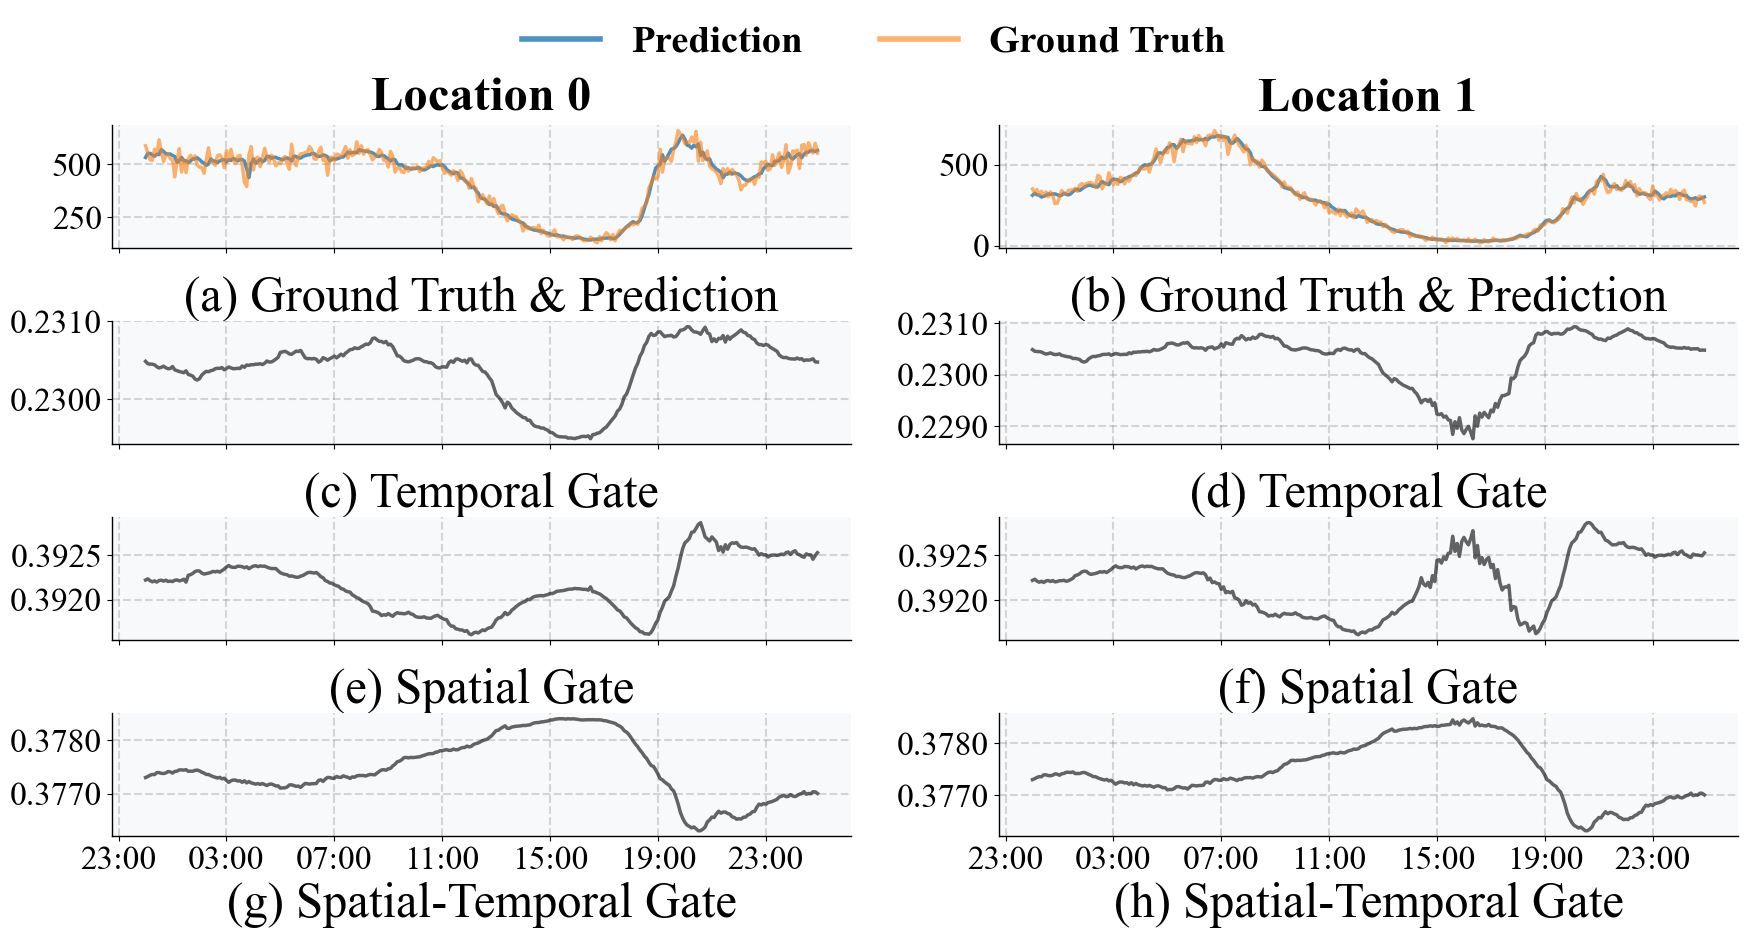

In [129]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

# ──────────────────── GLOBAL STYLE ────────────────────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#F7F9FA",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.3,
    "font.size": 24,           # ↑ 增大基础字号
    "axes.linewidth": 1,
})

# ──────────────────── 时间序列构造 ────────────────────
n_points = 300
start_time = pd.Timestamp("2017-08-07 00:00")
time_index = pd.date_range(start=start_time, periods=n_points, freq="5min")

# ──────────────────── 选择两个 location（数据第二个 index） ────────────────────
loc_indices = [0, 700]         # 实际索引
display_ids = [0, 1]           # 图上显示为 Location 0, Location 1（固定）

# ──────────────────── 绘图：4行×2列（每列一个 location） ────────────────────
fig, axs = plt.subplots(4, 2, figsize=(18, 10), sharex='col')  # 同列共享X轴
axs = np.asarray(axs)
# plt.subplots_adjust(wspace=-)

row_titles = ['Ground Truth & Prediction', 'Temporal Gate', 'Spatial Gate', 'Spatial-Temporal Gate']
letters = list("abcdefgh")  # (a)~(h)

# 用于全局图例的句柄收集（去重）
legend_handles = {}
def collect_handles(ax):
    for h, lbl in zip(*ax.get_legend_handles_labels()):
        if lbl and lbl not in legend_handles:
            legend_handles[lbl] = h

for col, (loc_idx, disp_id) in enumerate(zip(loc_indices, display_ids)):
    # 第1行：GT vs Prediction
    ax = axs[0, col]
    l1, = ax.plot(time_index, predictions[:n_points, 0, loc_idx], label='Prediction', alpha=0.8, linewidth=2.5)
    l2, = ax.plot(time_index, targets[:n_points,    0, loc_idx], label='Ground Truth', alpha=0.6, linewidth=2.5)
    collect_handles(ax)

    # 第2行：Gate T
    ax = axs[1, col]
    l3, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 1], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

    # 第3行：Gate S
    ax = axs[2, col]
    l4, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 2], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

    # 第4行：Gate ST
    ax = axs[3, col]
    l5, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 0], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

# 统一美化：日期、刻度、边框、Y轴小数、子图索引与行标题
for r in range(4):
    for c in range(2):
        ax = axs[r, c]
        # 日期：每天一个主刻度，仅底行显示标签
        # ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
        # ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d\n%H:%M"))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
        if r < 3:
            ax.set_xticklabels([])

        # Y轴格式：Gate行（r >= 1）保留4位小数；第1行随数据
        if r >= 1:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))

        # 去掉上/右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # 子图索引 (a)~(h) + 行标题置于下方
        letter = letters[r*2 + c]
        if r == 3:
            ax.text(0.5, -0.37, f"({letter}) {row_titles[r]}",
                transform=ax.transAxes, ha='center', va='top', fontsize=35)
        else:
            ax.text(0.5, -0.22, f"({letter}) {row_titles[r]}",
                    transform=ax.transAxes, ha='center', va='top', fontsize=35)

# 列标题（显示固定的 Location 0 / Location 1）
for c, disp_id in enumerate(display_ids):
    axs[0, c].set_title(f'Location {disp_id}', y=1.05, fontsize=35, fontweight='bold')

# 全局唯一图例放在图顶端（去重后的句柄）
leg = fig.legend(list(legend_handles.values()),
           list(legend_handles.keys()),
           loc='upper center', ncol=5, frameon=False, bbox_to_anchor=(0.5, 0.99), prop=FontProperties(weight='bold', size=28))
for line in leg.get_lines():
    line.set_linewidth(4.0)

# 布局：给顶部图例和列标题留空间
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.subplots_adjust(hspace=0.59, wspace=0.2)
plt.savefig('case_study_s.pdf', dpi=300, bbox_inches='tight')
plt.show()

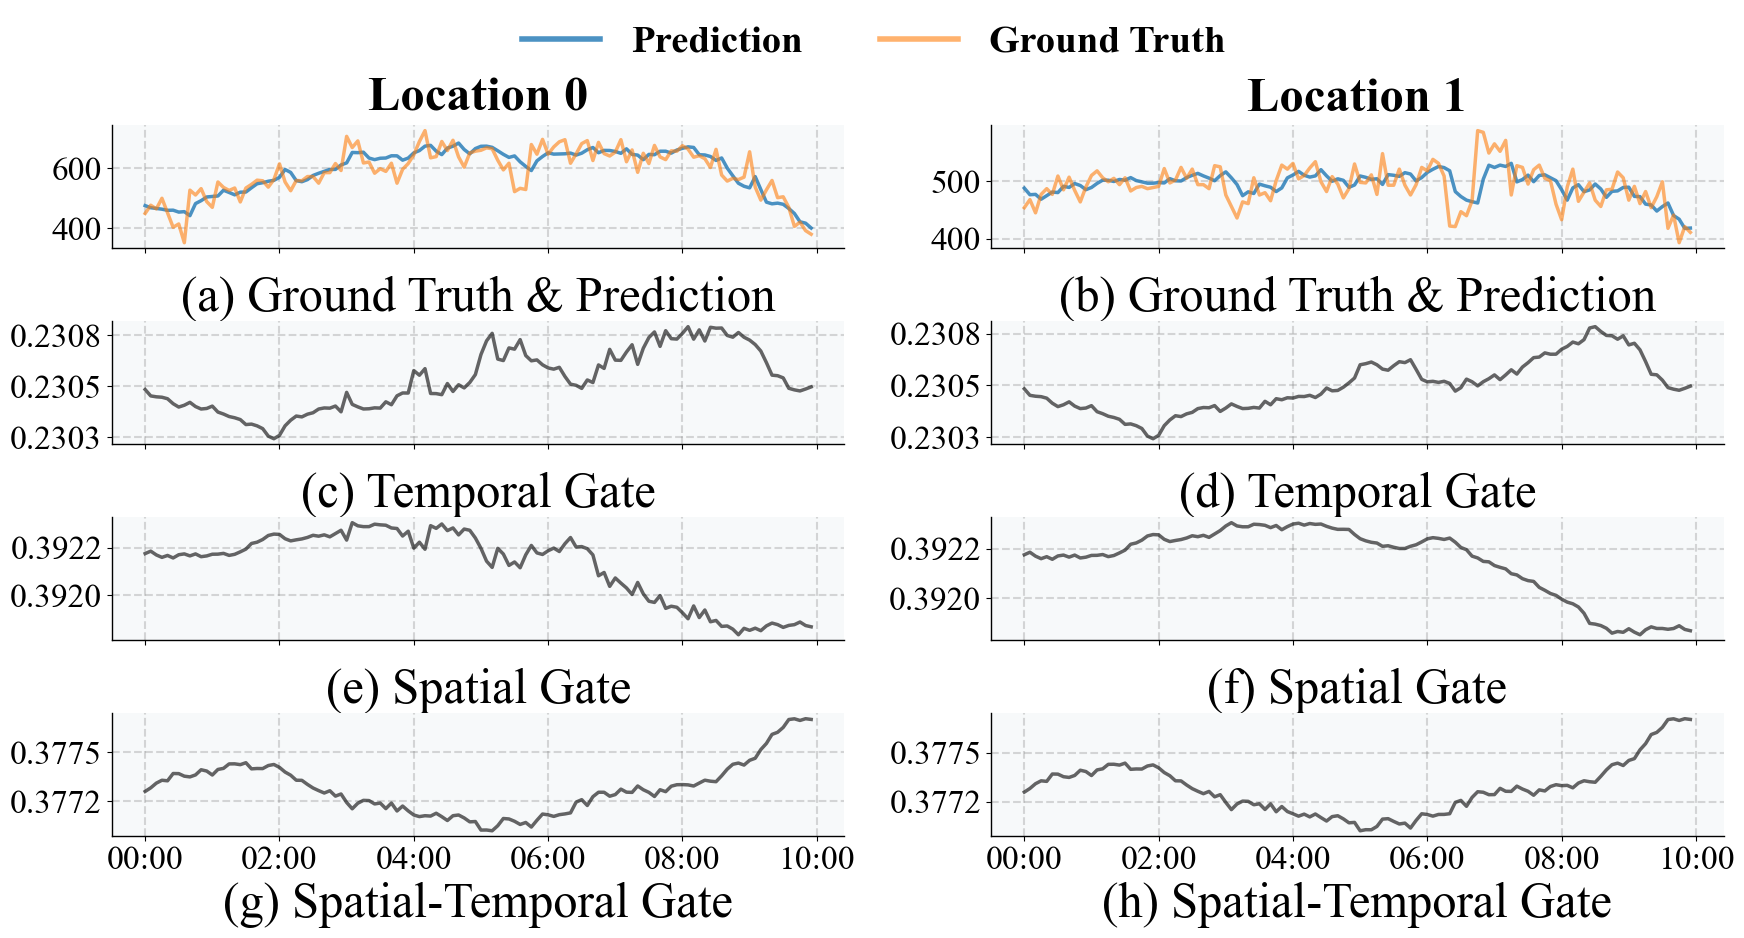

In [130]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

# ──────────────────── GLOBAL STYLE ────────────────────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#F7F9FA",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.3,
    "font.size": 24,           # ↑ 增大基础字号
    "axes.linewidth": 1,
})

# ──────────────────── 时间序列构造 ────────────────────
n_points = 120
start_time = pd.Timestamp("2017-08-07 00:00")
time_index = pd.date_range(start=start_time, periods=n_points, freq="5min")

# ──────────────────── 选择两个 location（数据第二个 index） ────────────────────
loc_indices = [100, 800]         # 实际索引
display_ids = [0, 1]           # 图上显示为 Location 0, Location 1（固定）

# ──────────────────── 绘图：4行×2列（每列一个 location） ────────────────────
fig, axs = plt.subplots(4, 2, figsize=(18, 10), sharex='col')  # 同列共享X轴
axs = np.asarray(axs)
# plt.subplots_adjust(wspace=-)

row_titles = ['Ground Truth & Prediction', 'Temporal Gate', 'Spatial Gate', 'Spatial-Temporal Gate']
letters = list("abcdefgh")  # (a)~(h)

# 用于全局图例的句柄收集（去重）
legend_handles = {}
def collect_handles(ax):
    for h, lbl in zip(*ax.get_legend_handles_labels()):
        if lbl and lbl not in legend_handles:
            legend_handles[lbl] = h

for col, (loc_idx, disp_id) in enumerate(zip(loc_indices, display_ids)):
    # 第1行：GT vs Prediction
    ax = axs[0, col]
    l1, = ax.plot(time_index, predictions[:n_points, 0, loc_idx], label='Prediction', alpha=0.8, linewidth=2.5)
    l2, = ax.plot(time_index, targets[:n_points,    0, loc_idx], label='Ground Truth', alpha=0.6, linewidth=2.5)
    collect_handles(ax)

    # 第2行：Gate T
    ax = axs[1, col]
    l3, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 1], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

    # 第3行：Gate S
    ax = axs[2, col]
    l4, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 2], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

    # 第4行：Gate ST
    ax = axs[3, col]
    l5, = ax.plot(time_index, gate[:n_points, 0, loc_idx, 0], alpha=0.6, linewidth=2.5, color='black')
    collect_handles(ax)

# 统一美化：日期、刻度、边框、Y轴小数、子图索引与行标题
for r in range(4):
    for c in range(2):
        ax = axs[r, c]
        # 日期：每天一个主刻度，仅底行显示标签
        # ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
        # ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d\n%H:%M"))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
        if r < 3:
            ax.set_xticklabels([])

        # Y轴格式：Gate行（r >= 1）保留4位小数；第1行随数据
        if r >= 1:
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))

        # 去掉上/右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # 子图索引 (a)~(h) + 行标题置于下方
        letter = letters[r*2 + c]
        if r == 3:
            ax.text(0.5, -0.37, f"({letter}) {row_titles[r]}",
                transform=ax.transAxes, ha='center', va='top', fontsize=35)
        else:
            ax.text(0.5, -0.22, f"({letter}) {row_titles[r]}",
                    transform=ax.transAxes, ha='center', va='top', fontsize=35)

# 列标题（显示固定的 Location 0 / Location 1）
for c, disp_id in enumerate(display_ids):
    axs[0, c].set_title(f'Location {disp_id}', y=1.05, fontsize=35, fontweight='bold')

# 全局唯一图例放在图顶端（去重后的句柄）
leg = fig.legend(list(legend_handles.values()),
           list(legend_handles.keys()),
           loc='upper center', ncol=5, frameon=False, bbox_to_anchor=(0.5, 0.99), prop=FontProperties(weight='bold', size=28))
for line in leg.get_lines():
    line.set_linewidth(4.0)

# 布局：给顶部图例和列标题留空间
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.subplots_adjust(hspace=0.59, wspace=0.2)
plt.savefig('case_study_ss.pdf', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_391353/3668964987.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.96, 1])


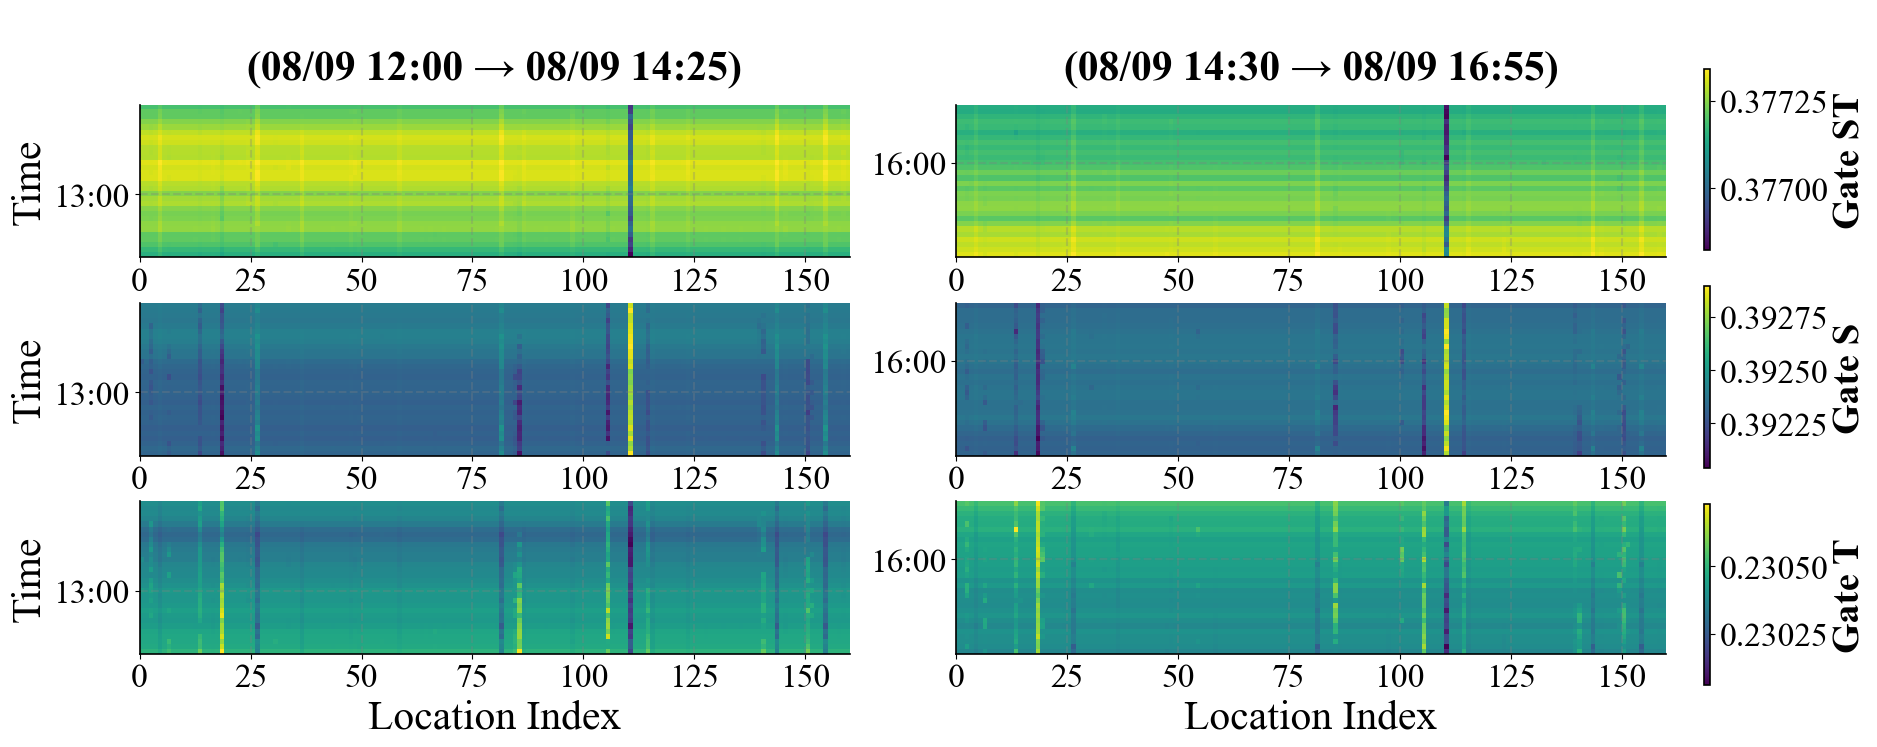

In [128]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

# ──────────────────── GLOBAL STYLE ────────────────────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#F7F9FA",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.3,
    "font.size": 24,
    "axes.linewidth": 1.2,
})

# ──────────────────── PARAMETERS ────────────────────
L = 160
n_points = 60
seg_len = n_points // 2
segments = [(0, seg_len), (seg_len, n_points)]
row_defs = [("Gate ST", 0), ("Gate S", 2), ("Gate T", 1)]  # (label, channel)
letters = list("abcdef")

# ──────────────────── TIME INDEX ────────────────────
start_time = pd.Timestamp("2017-08-09 12:00")
time_index = pd.date_range(start=start_time, periods=n_points, freq="5min")

# ──────────────────── FIGURE ────────────────────
fig, axs = plt.subplots(3, 2, figsize=(18, 8))
axs = np.asarray(axs)

# Column titles: two time segments
for c, (s, e) in enumerate(segments):
    t0 = mdates.num2date(mdates.date2num(time_index[s])).strftime("%m/%d %H:%M")
    t1 = mdates.num2date(mdates.date2num(time_index[e-1])).strftime("%m/%d %H:%M")
    axs[0, c].set_title(f"\n({t0} → {t1})",
                        fontsize=30, fontweight='bold', pad=18)

# ──────────────────── DRAW EACH CELL ────────────────────
im_last_in_row = [None, None, None]
for r, (row_label, ch) in enumerate(row_defs):
    for c, (s, e) in enumerate(segments):
        ax = axs[r, c]
        X = gate[s:e, 0, :L, ch]  # shape: time × location

        im = ax.imshow(
            X, aspect="auto", origin="lower",
            extent=[0, L,
                    mdates.date2num(time_index[s]),
                    mdates.date2num(time_index[e-1])]
        )
        im_last_in_row[r] = im

        # Time formatting
        ax.yaxis_date()
        ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax.yaxis.set_major_locator(mdates.HourLocator(interval=2))

        # Axis labels
        if c == 0:
            ax.set_ylabel("Time", fontsize=30)
        if r == 2:
            ax.set_xlabel("Location Index", fontsize=30)

        # Styling
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Subplot label (a)–(f)
        # letter = letters[r * 2 + c]
        # ax.text(0.02, 0.95, f"({letter})", transform=ax.transAxes,
        #         ha="left", va="top", fontsize=30, fontweight="bold")

    # Row label on left (aligned vertically to center)
    # axs[r, 0].text(-0.14, 0.5, row_label,
    #                transform=axs[r, 0].transAxes,
    #                rotation=90, va='center', ha='right',
    #                fontsize=28, fontweight='bold')

# ──────────────────── COLORBARS PER ROW ────────────────────
for r, im in enumerate(im_last_in_row):
    cbar = fig.colorbar(
        im,
        ax=axs[r, :].ravel().tolist(),
        location='right',
        fraction=0.03,
        pad=0.02,
        anchor=(0, 0.5),
        shrink=0.9,
        aspect=30,
        use_gridspec=False
    )
    cbar.ax.set_position([
        axs[r, -1].get_position().x1 + 0.10,  # shift right by 0.02
        axs[r, -1].get_position().y0,
        0.55,  # width of colorbar
        axs[r, -1].get_position().height
    ])
    cbar.set_label(row_defs[r][0], fontsize=28, fontweight='bold')

# ──────────────────── LAYOUT ────────────────────
plt.tight_layout(rect=[0, 0, 0.96, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.15)
plt.savefig("gate_maps_3x2.pdf", dpi=300, bbox_inches="tight")
plt.show()

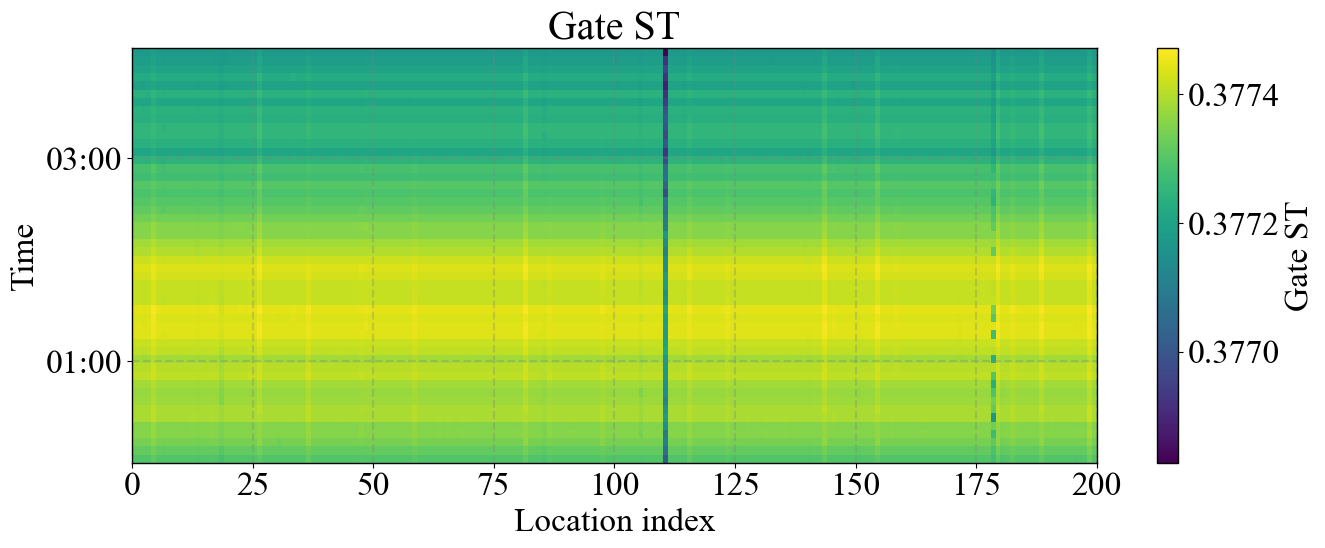

In [88]:
L = 200
n_points = 50
X = gate[:n_points, 0, :L, 0]    # shape: time × location

fig, ax = plt.subplots(figsize=(14, 6))
# Transpose the data (now location × time)
im = ax.imshow(
    X, aspect="auto", origin="lower",
    extent=[0, L,
            mdates.date2num(time_index[0]),
            mdates.date2num(time_index[n_points-1])]
)

ax.yaxis_date()
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_ylabel("Time")
ax.set_xlabel("Location index")
ax.set_title("Gate ST")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Gate ST")

# Optional: emphasize daily/hourly ticks on the y-axis
ax.yaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.tight_layout()
plt.show()

In [2]:
# load embedding
import numpy as np

emb_t = np.load('embeddings_t.npy')
emb_s = np.load('embeddings_s.npy')
emb_st = np.load('embeddings_st.npy')

PEMS04_path = '/scratch/vjd5zr/project/BasicTS/checkpoints/AdaST/PEMS04_40_12_12/dff22b8d092a498320c172dfa80f450e/embeddings'
emb_t_4 = np.load(f'{PEMS04_path}/embeddings_t.npy')
emb_s_4 = np.load(f'{PEMS04_path}/embeddings_s.npy')
emb_st_4 = np.load(f'{PEMS04_path}/embeddings_st.npy')


In [97]:
print(emb_t.shape)

(5621, 12, 883, 224)


/project/uvadm/zhenyu/miniconda3/envs/air_quality/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


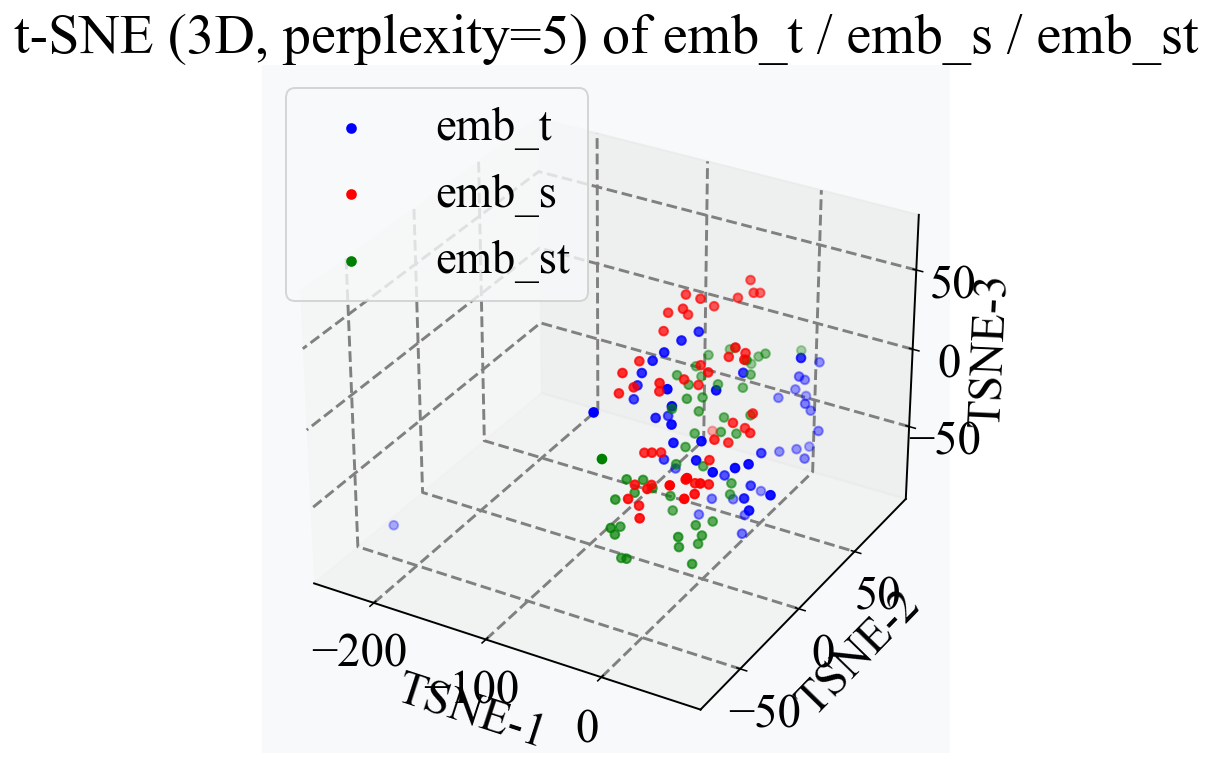

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 取出你的三组 embedding
emb_1 = emb_t[200, 0, 0:50, :]
emb_2 = emb_s[200, 0, 0:50, :]
emb_3 = emb_st[200, 0, 0:50, :]

# 标准化
X1 = StandardScaler().fit_transform(emb_1)
X2 = StandardScaler().fit_transform(emb_2)
X3 = StandardScaler().fit_transform(emb_3)

# ========== PCA ==========
# pca = PCA(n_components=3, random_state=42)
# X1_pca = pca.fit_transform(X1)
# X2_pca = pca.fit_transform(X2)
# X3_pca = pca.fit_transform(X3)

# fig = plt.figure(figsize=(8,6), dpi=140)
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X1_pca[:,0], X1_pca[:,1], X1_pca[:,2], c='b', label='emb_t')
# ax.scatter(X2_pca[:,0], X2_pca[:,1], X2_pca[:,2], c='r', label='emb_s')
# ax.scatter(X3_pca[:,0], X3_pca[:,1], X3_pca[:,2], c='g', label='emb_st')

# ax.set_title("PCA (3D) of emb_t / emb_s / emb_st")
# ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
# ax.legend()
# plt.tight_layout()
# plt.show()

# ========== t-SNE ==========
# 拼接后统一降维（保持三类的相对结构）
X_all = np.vstack([X1, X2, X3])
labels = np.array([0]*len(X1) + [1]*len(X2) + [2]*len(X3))

tsne = TSNE(n_components=3, perplexity=5, n_iter=1000,
            learning_rate="auto", init="pca", random_state=42)
X_tsne3 = tsne.fit_transform(X_all)

fig2 = plt.figure(figsize=(8,6), dpi=140)
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X_tsne3[labels==0,0], X_tsne3[labels==0,1], X_tsne3[labels==0,2], c='b', label='emb_t')
ax2.scatter(X_tsne3[labels==1,0], X_tsne3[labels==1,1], X_tsne3[labels==1,2], c='r', label='emb_s')
ax2.scatter(X_tsne3[labels==2,0], X_tsne3[labels==2,1], X_tsne3[labels==2,2], c='g', label='emb_st')

ax2.set_title("t-SNE (3D, perplexity=5) of emb_t / emb_s / emb_st")
ax2.set_xlabel("TSNE-1"); ax2.set_ylabel("TSNE-2"); ax2.set_zlabel("TSNE-3")
ax2.legend()
plt.tight_layout()
plt.show()

17， 200

500 900

/project/uvadm/zhenyu/miniconda3/envs/air_quality/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


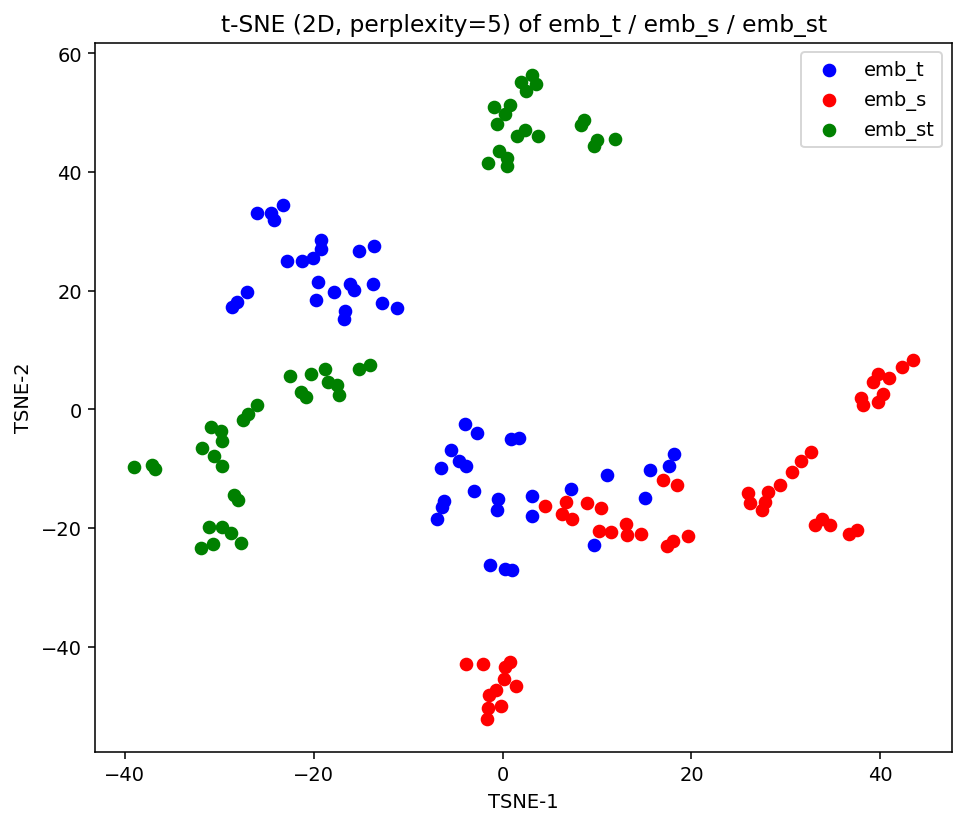

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 三组 embedding
emb_1 = emb_t_4[1300, 0, 0:50, :]
emb_2 = emb_s_4[1300, 0, 0:50, :]
emb_3 = emb_st_4[1300, 0, 0:50, :]

# 标准化
X1 = StandardScaler().fit_transform(emb_1)
X2 = StandardScaler().fit_transform(emb_2)
X3 = StandardScaler().fit_transform(emb_3)

# ========== PCA (2D) ==========
# pca = PCA(n_components=2, random_state=42)
# X1_pca = pca.fit_transform(X1)
# X2_pca = pca.fit_transform(X2)
# X3_pca = pca.fit_transform(X3)

# plt.figure(figsize=(7,6), dpi=140)
# plt.scatter(X1_pca[:,0], X1_pca[:,1], c='b', label='emb_t')
# plt.scatter(X2_pca[:,0], X2_pca[:,1], c='r', label='emb_s')
# plt.scatter(X3_pca[:,0], X3_pca[:,1], c='g', label='emb_st')
# plt.title("PCA (2D) of emb_t / emb_s / emb_st")
# plt.xlabel("PC1"); plt.ylabel("PC2")
# plt.legend()
# plt.tight_layout()
# plt.show()

# ========== t-SNE (2D) ==========
# 拼接一起做统一降维
X_all = np.vstack([X1, X2, X3])
labels = np.array([0]*len(X1) + [1]*len(X2) + [2]*len(X3))

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000,
            learning_rate="auto", init="pca", random_state=42)
X_tsne2 = tsne.fit_transform(X_all)

plt.figure(figsize=(7,6), dpi=140)
plt.scatter(X_tsne2[labels==0,0], X_tsne2[labels==0,1], c='b', label='emb_t')
plt.scatter(X_tsne2[labels==1,0], X_tsne2[labels==1,1], c='r', label='emb_s')
plt.scatter(X_tsne2[labels==2,0], X_tsne2[labels==2,1], c='g', label='emb_st')
plt.title("t-SNE (2D, perplexity=5) of emb_t / emb_s / emb_st")
plt.xlabel("TSNE-1"); plt.ylabel("TSNE-2")
plt.legend()
plt.tight_layout()
plt.show()

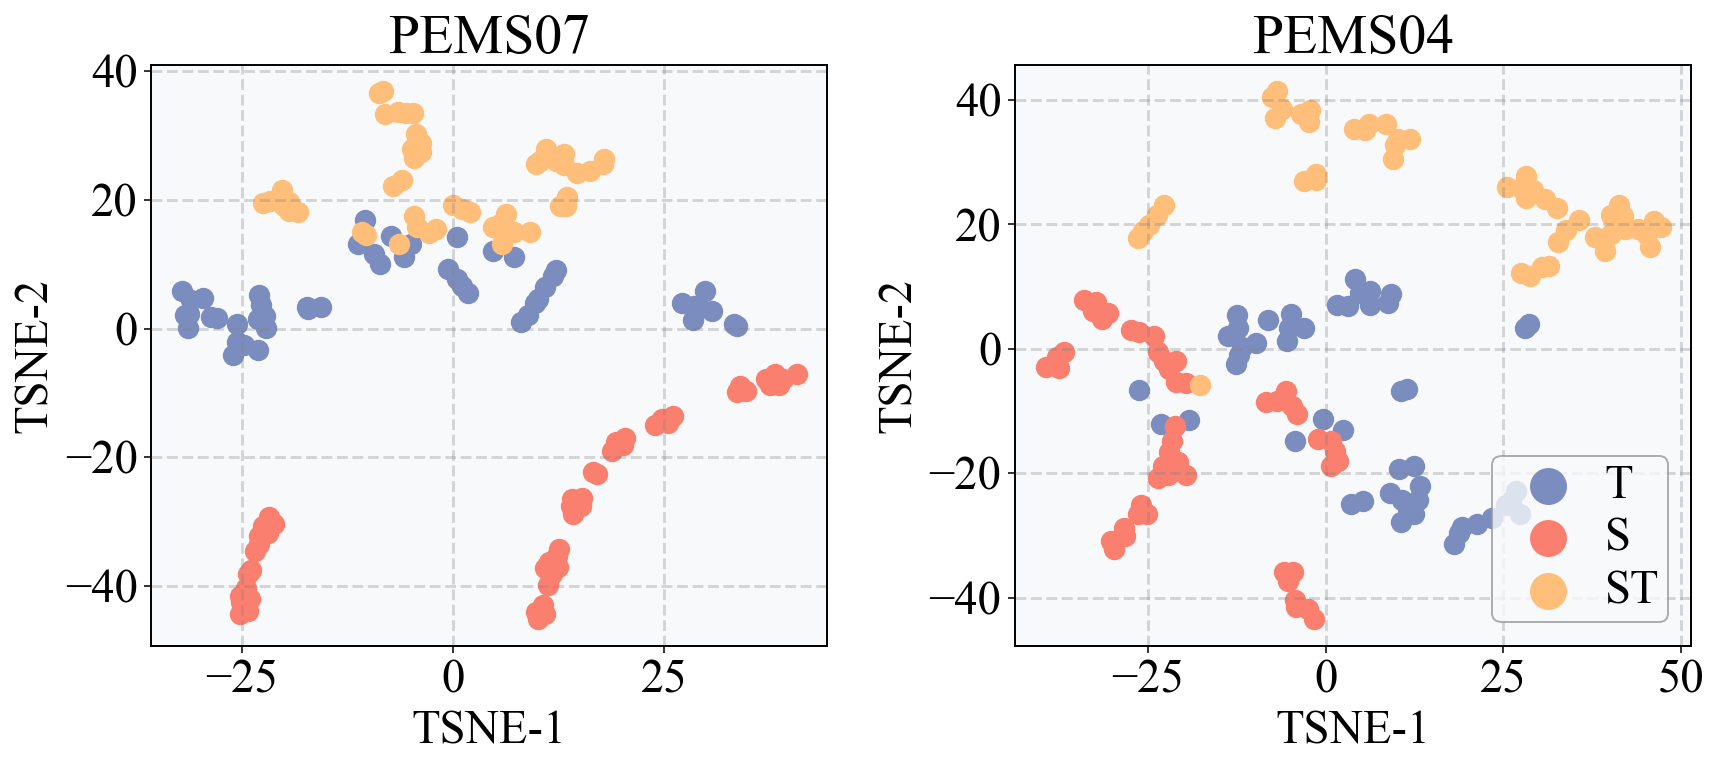

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#F7F9FA",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.3,
    "font.size": 24,
    "axes.linewidth": 1,
})

# ----------- 颜色调色板（取前三个） -----------
PALETTE = [
    (123/255.0, 141/255.0, 191/255.0),  # color 0
    (250/255.0, 127/255.0, 111/255.0),  # color 1
    (130/255.0, 176/255.0, 210/255.0),  # color 2
    (255/255.0, 190/255.0, 122/255.0),
    (87/255.0, 184/255.0, 147/255.0),
    "#C76DA2",
]

# ================== 假设你已有以下两组 emb ==================
# Group A -> PEMS07
emb_1a = emb_t[200, 0, 0:50, :]
emb_2a = emb_s[200, 0, 0:50, :]
emb_3a = emb_st[200, 0, 0:50, :]

# Group B -> PEMS04
emb_1b = emb_t_4[900, 0, 0:50, :]
emb_2b = emb_s_4[900, 0, 0:50, :]
emb_3b = emb_st_4[900, 0, 0:50, :]

# ================== 标准化 ==================
def standardize(*arrays):
    return [StandardScaler().fit_transform(a) for a in arrays]

X1a, X2a, X3a = standardize(emb_1a, emb_2a, emb_3a)
X1b, X2b, X3b = standardize(emb_1b, emb_2b, emb_3b)

# ================== t-SNE 降维函数 ==================
def run_tsne(X1, X2, X3, perplexity=5):
    X_all = np.vstack([X1, X2, X3])
    labels = np.array([0]*len(X1) + [1]*len(X2) + [2]*len(X3))
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000,
                learning_rate="auto", init="pca", random_state=42)
    X_tsne = tsne.fit_transform(X_all)
    return X_tsne, labels

# X_tsne_a, labels_a = run_tsne(X1a, X2a, X3a)  # PEMS07
# X_tsne_b, labels_b = run_tsne(X1b, X2b, X3b)  # PEMS04

# ================== 绘制 1x2 子图 ==================
fig, axes = plt.subplots(1, 2, figsize=(12.8, 6), dpi=140)

# 通用：点大小
point_size = 100  # 不改 legend 的前提下，点大小适中

# 左图（PEMS07）——不要 legend
axes[0].scatter(X_tsne_a[labels_a==0,0], X_tsne_a[labels_a==0,1], s=point_size, c=[PALETTE[0]], label='T')
axes[0].scatter(X_tsne_a[labels_a==1,0], X_tsne_a[labels_a==1,1], s=point_size, c=[PALETTE[1]], label='S')
axes[0].scatter(X_tsne_a[labels_a==2,0], X_tsne_a[labels_a==2,1], s=point_size, c=[PALETTE[3]], label='ST')
axes[0].set_title("PEMS07")
axes[0].set_xlabel("TSNE-1")
axes[0].set_ylabel("TSNE-2")
# 不显示 legend
# axes[0].legend()

# 右图（PEMS04）——显示 legend（T/S/ST），legend 点更大
sc0 = axes[1].scatter(X_tsne_b[labels_b==0,0], X_tsne_b[labels_b==0,1], s=point_size, c=[PALETTE[0]], label='T')
sc1 = axes[1].scatter(X_tsne_b[labels_b==1,0], X_tsne_b[labels_b==1,1], s=point_size, c=[PALETTE[1]], label='S')
sc2 = axes[1].scatter(X_tsne_b[labels_b==2,0], X_tsne_b[labels_b==2,1], s=point_size, c=[PALETTE[3]], label='ST')
axes[1].set_title("PEMS04")
axes[1].set_xlabel("TSNE-1")
axes[1].set_ylabel("TSNE-2")
# legend 的点加大：markerscale>1
leg = axes[1].legend(loc='best', markerscale=1.8, frameon=True, edgecolor='0.6', handletextpad=0.2, borderpad=0.2, labelspacing=0.2)

plt.tight_layout()
plt.savefig('tsne_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()